<a href="https://colab.research.google.com/github/ManideepAnnarapu/Heart_Disease_Prediction_ANN/blob/main/Heart_Disease_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction using Artificial Neural Networks

## Introduction
This project aims to predict the presence of heart disease in patients using Artificial Neural Networks (ANN).


In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
# Load the dataset
url = 'https://raw.githubusercontent.com/ManideepAnnarapu/Heart_Disease_Prediction_ANN/919d0a898b31de9edb8924354a864e6aa6a724ec/heart.csv'
data = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


## Exploratory Data Analysis (EDA)
EDA involves understanding the dataset through descriptive statistics and visualizations:
- Descriptive statistics provide a summary of the central tendency, dispersion, and shape of the dataset’s distribution.
- Checking for null values ensures data completeness.
- Visualizations like count plots and heatmaps help understand the distribution and correlations within the data.


In [34]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


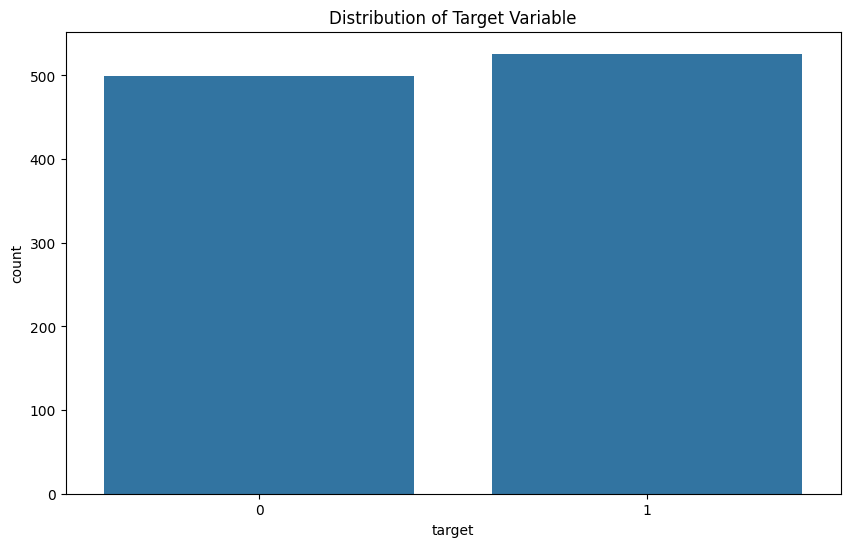

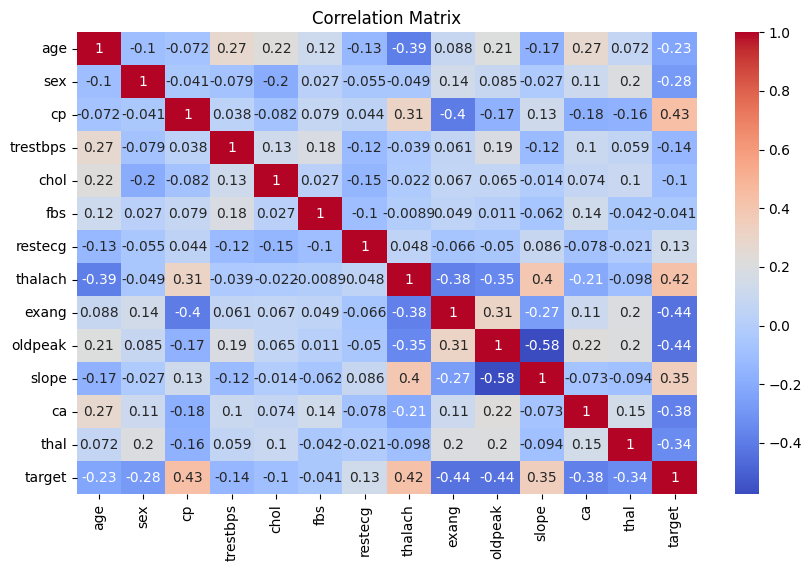

In [36]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

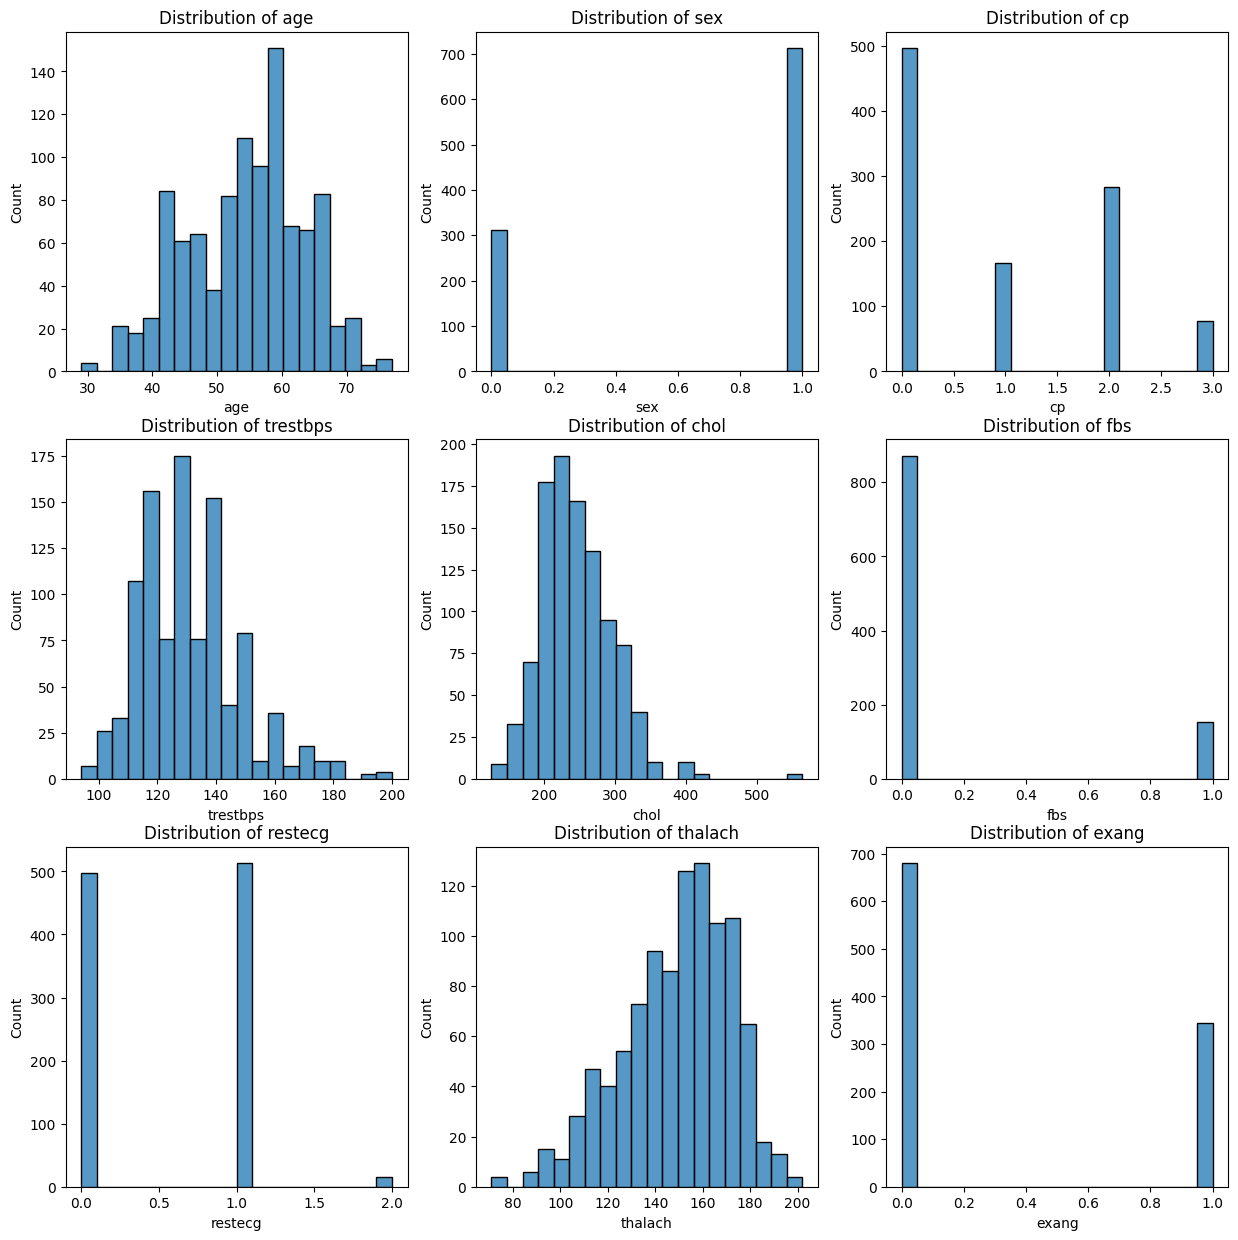

In [37]:
# Distribution of key features
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, col in enumerate(data.columns[:-1]):
    sns.histplot(data[col], bins=20, ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [38]:
# Splitting the dataset into features and target variable
X = data.iloc[:,:13].values
y = data["target"].values

In [39]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [40]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Architecture
The model is an ANN with the following architecture:
- **Input Layer**: 13 input features.
- **Hidden Layers**: Two hidden layers with 8 and 14 units respectively, using the ReLU activation function.
- **Output Layer**: One unit with a sigmoid activation function to predict the binary target variable.


In [41]:
# Initializing the ANN
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=13, units=8, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=14, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training Process
The model is trained using the Adam optimizer and binary cross-entropy loss function over 100 epochs. The training process is visualized through plots of accuracy and loss over epochs.


In [42]:
# Training the ANN
history = classifier.fit(X_train, y_train, batch_size=8, epochs=100)


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6129 - loss: 0.6909
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.5976
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.4272
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8564 - loss: 0.3670
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.3900
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8206 - loss: 0.3945
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 0.3673
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.3274
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8583 - loss: 0.3451
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8740 - loss: 0.3330
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8604 - loss: 0.3212
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

## Model Evaluation
The model's performance is evaluated using a confusion matrix, classification report, and accuracy score. These metrics provide insights into the model's predictive power and potential areas for improvement.


In [43]:
# Making predictions on the test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[139   6]
 [  6 157]]


In [45]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       145
           1       0.96      0.96      0.96       163

    accuracy                           0.96       308
   macro avg       0.96      0.96      0.96       308
weighted avg       0.96      0.96      0.96       308



In [46]:
# Accuracy
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 96.10%


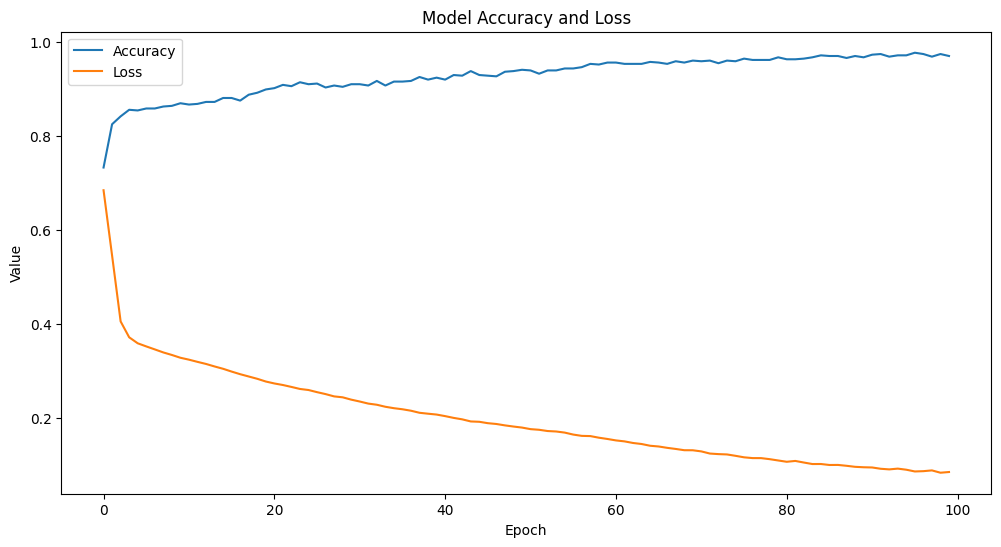

In [47]:
# Visualizing the training process
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

## Conclusion
This ANN model demonstrates a strong ability to predict heart disease, with an accuracy of 96%. Future improvements could involve hyperparameter tuning, additional feature engineering, and exploring other machine learning models.
